In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bank = pd.read_csv('../Datasets/bank-full.csv')

In [3]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Data Visualization and Analysis

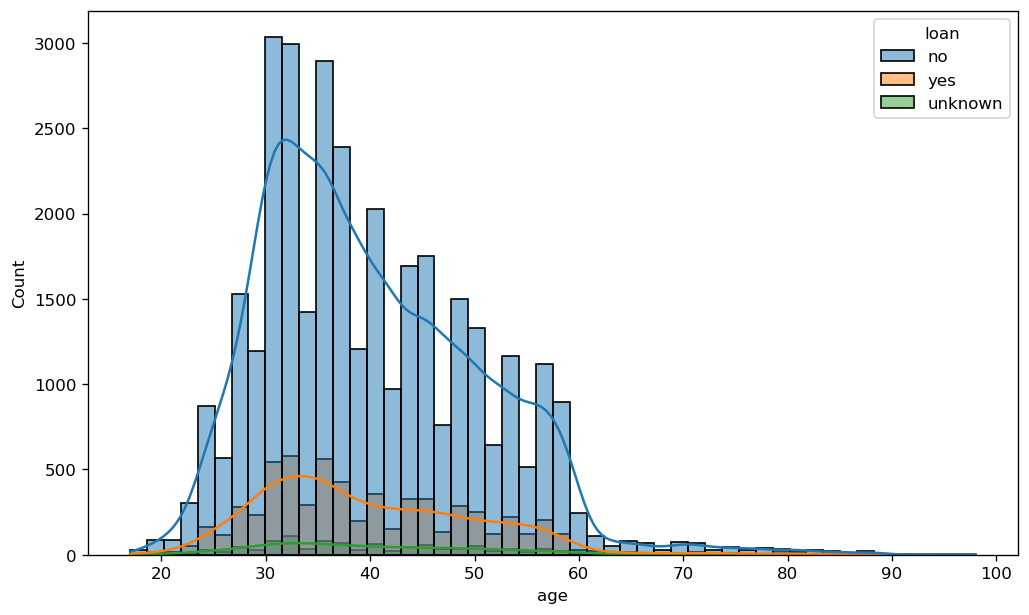

In [11]:
plt.figure(figsize=(10,6),dpi=120)
sns.histplot(data=bank,x='age',bins=50,kde=True,hue='loan')
plt.show()

<AxesSubplot:xlabel='default', ylabel='count'>

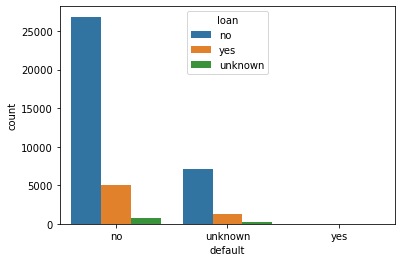

In [15]:
#countplot for default customber
sns.countplot(data=bank,x='default',hue='loan')

<AxesSubplot:xlabel='loan', ylabel='count'>

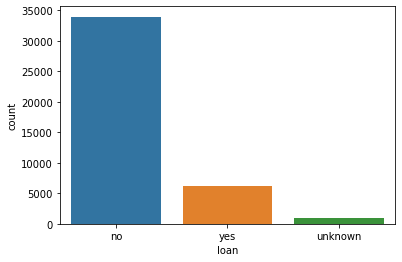

In [17]:
#countplot for already have loan
sns.countplot(data=bank,x='loan')

In [30]:
bank.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

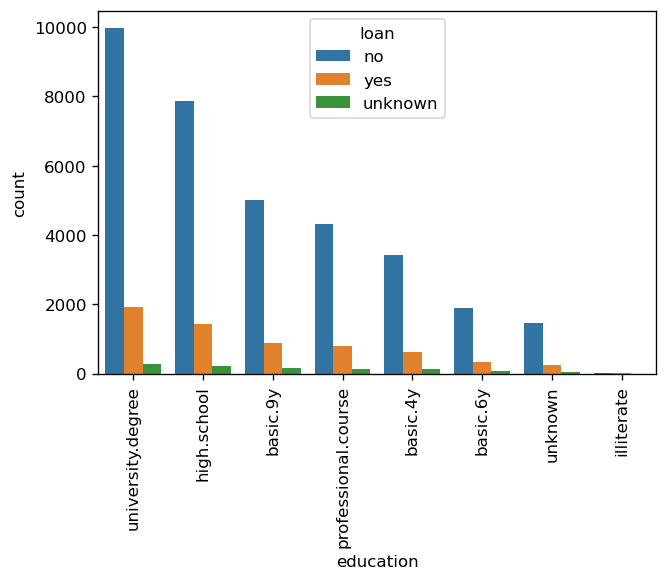

In [41]:
#education
plt.figure(figsize=(6,4),dpi=120)
sns.countplot(data=bank,x='education',order = bank.education.value_counts().index,hue='loan')
plt.xticks(rotation=90)
plt.show()

In [36]:
#help(sns.countplot)

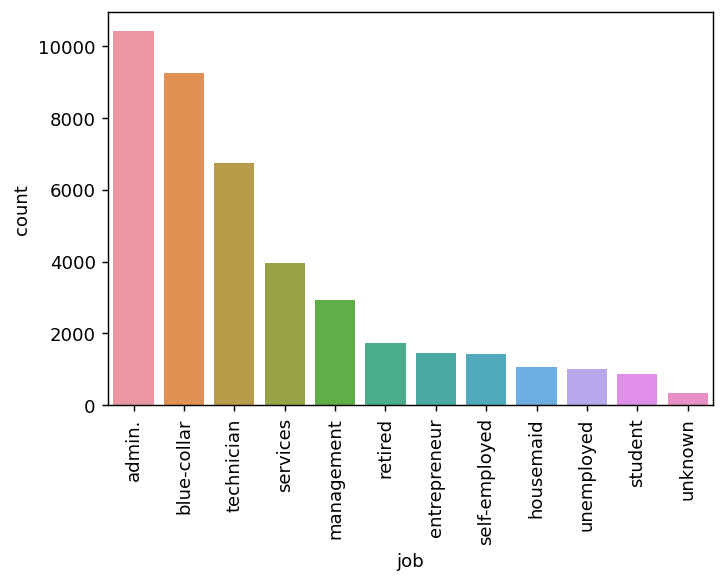

In [40]:
plt.figure(figsize=(6,4),dpi=130)
sns.countplot(data=bank,x='job',order=bank['job'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='subscribed', ylabel='count'>

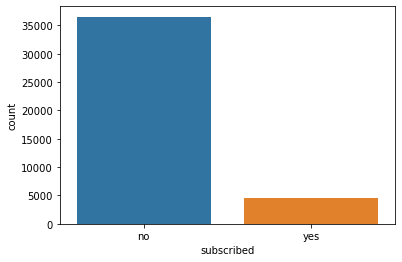

In [43]:
sns.countplot(data=bank,x='subscribed')

<AxesSubplot:xlabel='contact', ylabel='count'>

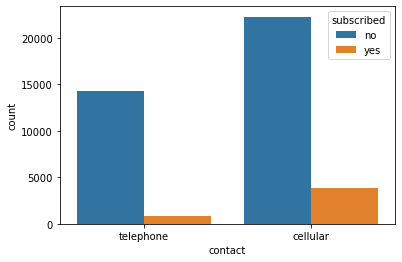

In [45]:
sns.countplot(data=bank,x='contact',hue='subscribed')

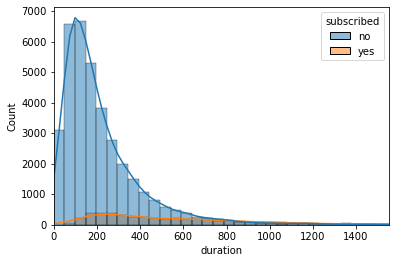

In [56]:
sns.histplot(data=bank,x='duration',bins=100,hue='subscribed',kde=True)
plt.xlim(0,1550)
plt.show()

In [57]:
df = pd.get_dummies(bank,drop_first=True)

In [59]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0


In [60]:
#Feature Engineering
from sklearn.preprocessing import StandardScaler

In [63]:
X_sclar = StandardScaler()
X_train=X_sclar.fit_transform(df)

# #K-Means Clustering

In [64]:
from sklearn.cluster import KMeans

In [65]:
model = KMeans(n_clusters=2,random_state=101)

In [74]:
cluster_label = model.fit_predict(X_train)

In [68]:
model.inertia_

2042697.9644462913

In [75]:
model.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [77]:
df['cluster_label'] = model.labels_

In [78]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,subscribed_yes,cluster_label
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,1,0,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,1,0,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,1,0,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,1,0,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,1,0,0,0


<AxesSubplot:>

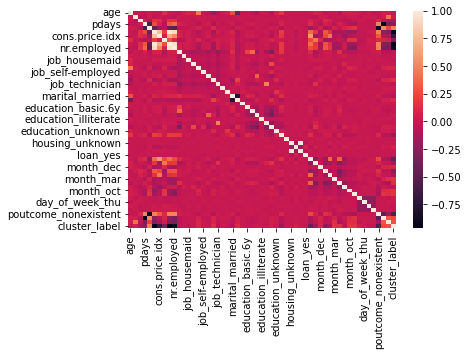

In [80]:
#heatmap
sns.heatmap(df.corr())

In [100]:
##Cluster_label correlation with features
imp_feature = df.corr()['cluster_label'][:-1].sort_values()

In [101]:
imp_feature

euribor3m                       -0.964411
emp.var.rate                    -0.934869
nr.employed                     -0.892315
cons.price.idx                  -0.676559
poutcome_nonexistent            -0.544988
contact_telephone               -0.405626
cons.conf.idx                   -0.330223
pdays                           -0.269023
month_jul                       -0.267759
default_unknown                 -0.184357
month_aug                       -0.161708
month_jun                       -0.135945
campaign                        -0.128067
marital_married                 -0.087530
job_technician                  -0.046225
job_blue-collar                 -0.037344
month_nov                       -0.036741
job_housemaid                   -0.036153
day_of_week_wed                 -0.029553
day_of_week_tue                 -0.021492
age                             -0.019385
education_basic.6y              -0.018407
education_professional.course   -0.017907
job_unknown                     -0

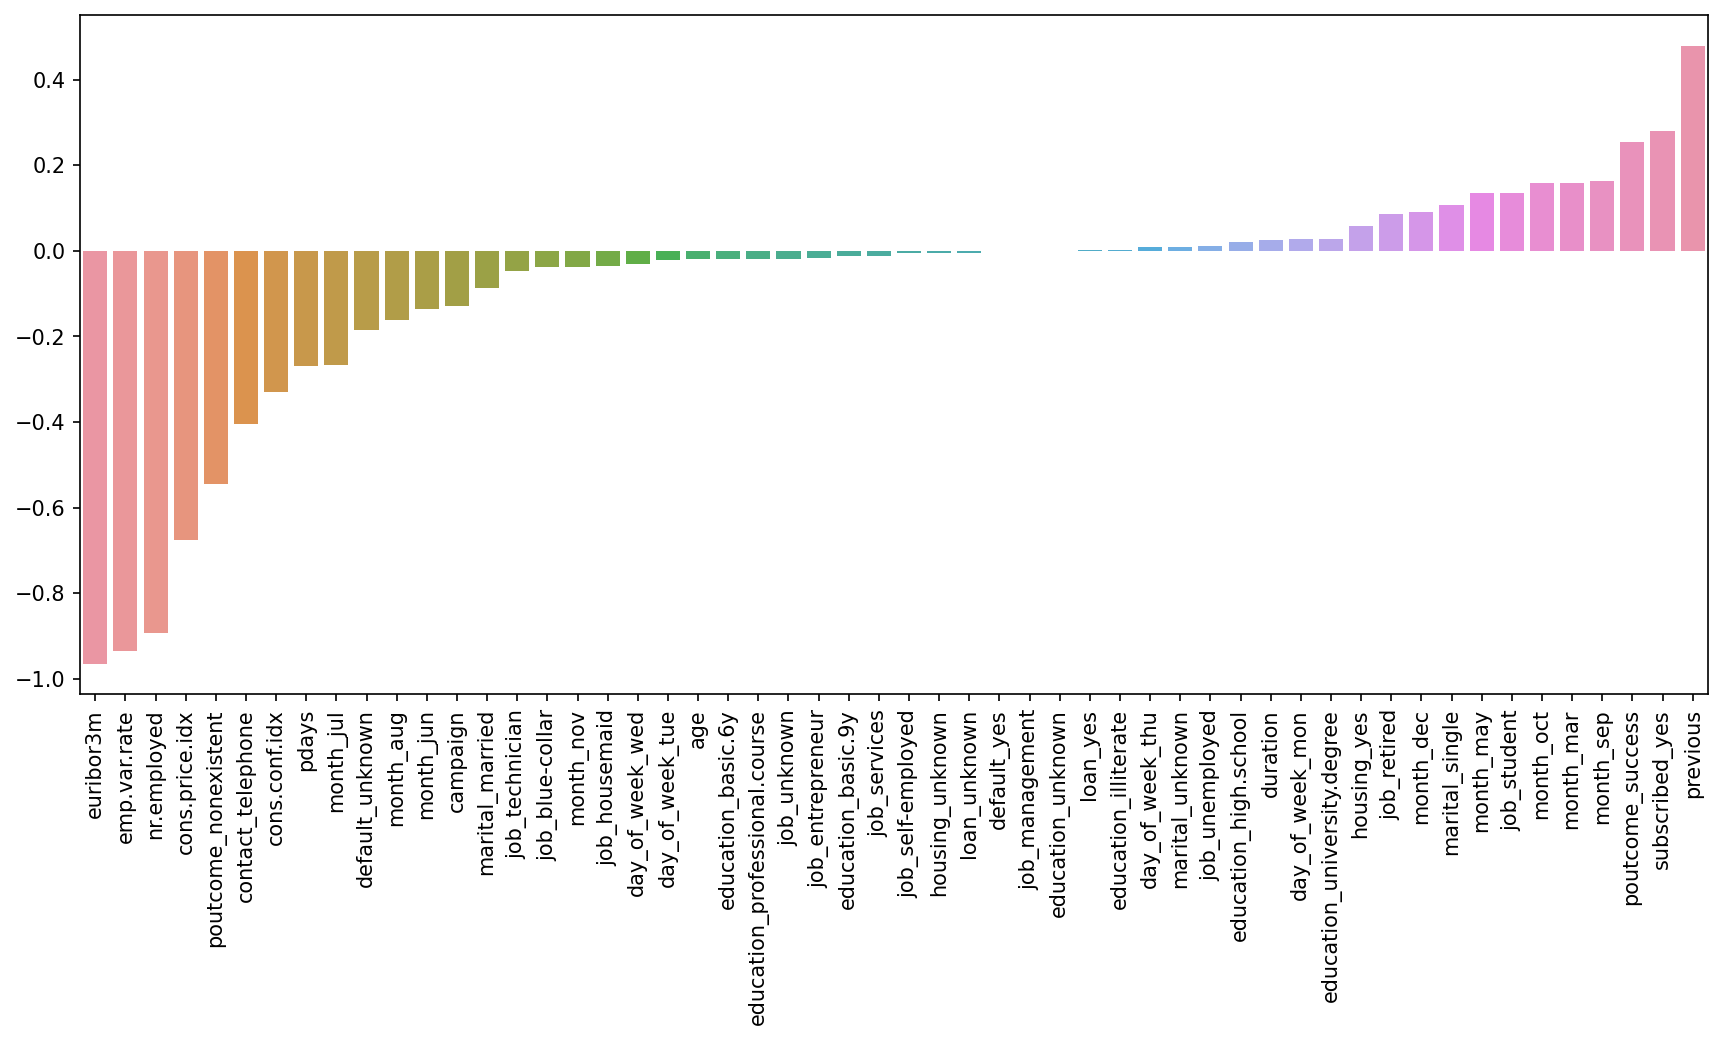

In [104]:
#plot the correlation feature
plt.figure(figsize=(14,6),dpi=150)
sns.barplot(y=imp_feature.values,x=imp_feature.index)
plt.xticks(rotation=90)
plt.show()

## #Best K-value for model

In [106]:
ssd = []
for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(X_train)
    ssd.append(model.inertia_)

In [108]:
ssd

[2042697.9644462913,
 1947241.4887108752,
 1878557.6642250959,
 1823828.7277270465,
 1774141.2376309894,
 1711622.3322650534,
 1658072.0953340032,
 1649365.571817193]

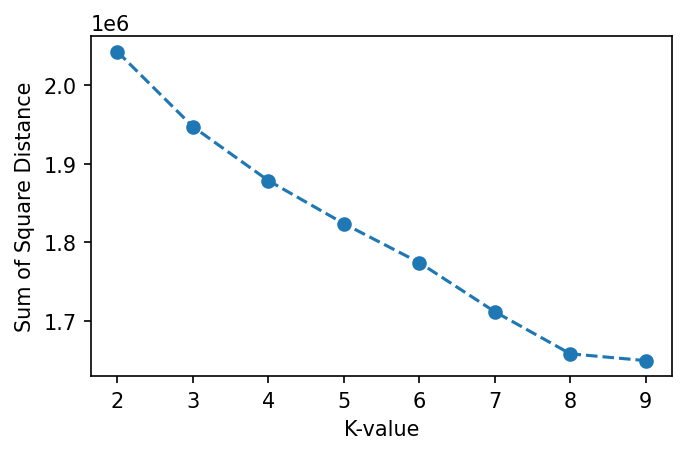

In [111]:
#plot ssd
plt.figure(figsize=(5,3),dpi=150)
plt.plot(range(2,10),ssd,'o--')
plt.xlabel('K-value')
plt.ylabel('Sum of Square Distance')
plt.show()

In [112]:
#diffrence of previous k value
pd.Series(ssd).diff()

0             NaN
1   -95456.475735
2   -68683.824486
3   -54728.936498
4   -49687.490096
5   -62518.905366
6   -53550.236931
7    -8706.523517
dtype: float64

<AxesSubplot:>

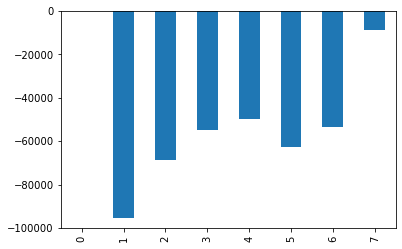

In [114]:
pd.Series(ssd).diff().plot(kind='bar')